## SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

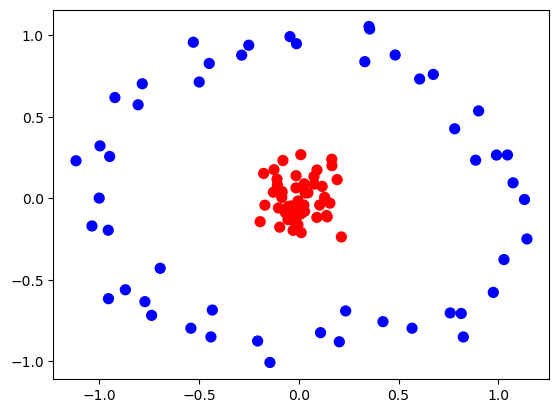

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45

In [6]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                    stop = X_set[:, 0].max() + 1, 
                                    step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, 
                                    stop = X_set[:, 1].max() + 1, 
                                    step = 0.01))
    
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                                X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, 
                cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\uzebk\AppData\Local\Temp\ipykernel_23568\630669383.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


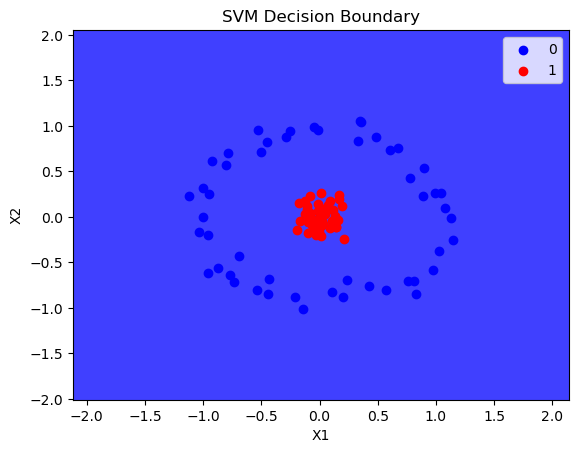

In [7]:
plot_decision_boundary(X, y, classifier)

In [8]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

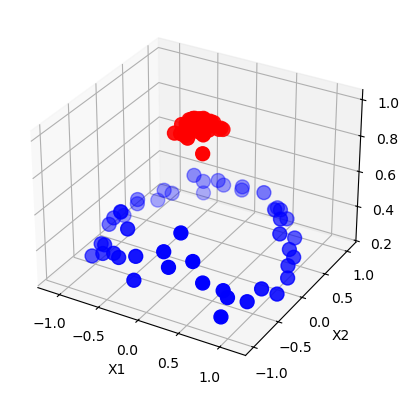

In [9]:
plot_3d_plot(X,y)

In [10]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\uzebk\AppData\Local\Temp\ipykernel_23568\630669383.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


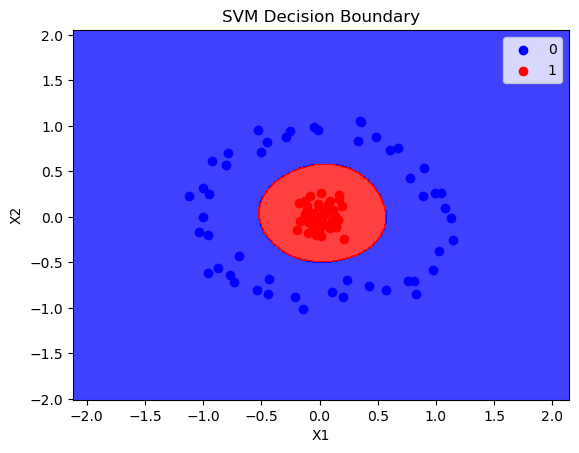

In [12]:
plot_decision_boundary(X, y, rbf_classifier)

In [13]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\uzebk\AppData\Local\Temp\ipykernel_23568\630669383.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


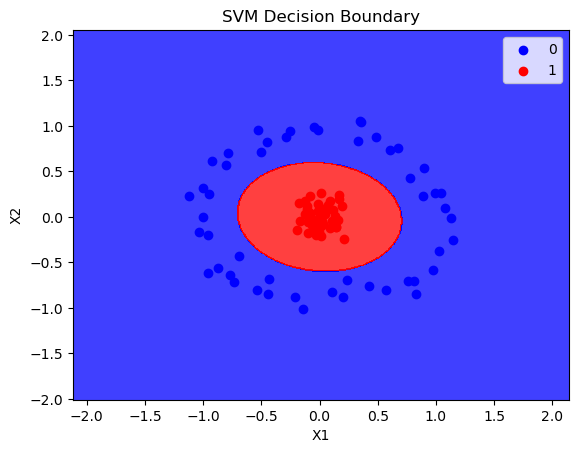

In [15]:
plot_decision_boundary(X, y, poly_classifier)

In [16]:
X

array([[-0.02637332, -0.13623207],
       [-1.11724331,  0.23029541],
       [-0.01410422,  0.1388746 ],
       [ 0.11653404,  0.07306238],
       [ 0.16473626,  0.23984167],
       [-0.10961042,  0.11754346],
       [-0.12474548,  0.17563783],
       [-0.17658763,  0.15259596],
       [ 0.04522906,  0.03359715],
       [ 0.00973409,  0.26778545],
       [-0.73827676, -0.71897676],
       [-0.49969048,  0.71387166],
       [-0.20687539, -0.87643189],
       [-0.77175822, -0.63470496],
       [ 0.35150995,  1.05501628],
       [-0.19424156, -0.14375688],
       [ 0.97450696, -0.57799113],
       [-0.43396003, -0.68624545],
       [-0.06741813, -0.08809976],
       [ 1.13086711, -0.00741839],
       [-0.05349491, -0.05095424],
       [ 0.56742196, -0.79788596],
       [ 0.00851604, -0.09506427],
       [-0.28676987,  0.87917887],
       [ 1.0280458 , -0.37616638],
       [ 0.01148571, -0.21082541],
       [ 0.99057562,  0.26562739],
       [-0.04485311,  0.99255237],
       [ 0.33049539,

In [17]:
np.exp(-(X**2)).sum(1)

array([1.98091667, 1.2353575 , 1.98069972, 1.98118772, 1.9173261 ,
       1.97433599, 1.95418134, 1.94628148, 1.99682829, 1.93070693,
       1.17616127, 1.37976997, 1.42198384, 1.21963789, 1.21232154,
       1.94251916, 1.10287204, 1.45276803, 1.98773359, 1.2782993 ,
       1.99454942, 1.25379824, 1.99093098, 1.38270034, 1.21559325,
       1.95639404, 1.30671976, 1.37136962, 1.39121843, 1.49443523,
       1.97411099, 1.19385919, 1.99623522, 1.30781127, 1.12187698,
       1.30680911, 1.98020891, 1.97820964, 1.99183814, 1.4005292 ,
       1.95989345, 1.99569411, 1.98747894, 1.37689331, 1.36712142,
       1.08579947, 1.98657049, 1.9997035 , 1.14969278, 1.41981818,
       1.36349545, 1.26680189, 1.17156092, 1.93350235, 1.99266481,
       1.96125641, 1.98240974, 1.40277966, 1.9620986 , 1.35207227,
       1.31239195, 1.97522616, 1.44790592, 1.27494137, 1.99641153,
       1.34299485, 1.19868561, 1.99172355, 1.2414849 , 1.96984762,
       1.95084103, 1.40598994, 1.56618345, 1.98117841, 1.96711

In [18]:
X_new=np.exp(-(X**2))

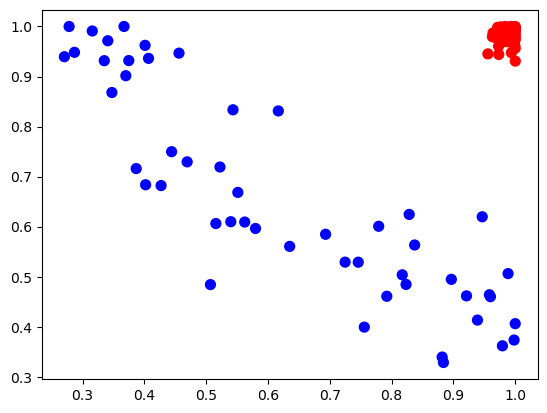

In [19]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')